¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿El futuro videojuego tendrá exito?

## Introducción

### Descripción

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, 
los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos 
están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. 
Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Objetivo

Identificar patrones que determinen si un juego tiene éxito o no para detectar proyectos prometedores y planificar 
campañas publicitarias efectivas.

### Datos

El dataset contiene datos históricos hasta el año 2016 e incluye columnas como:

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Tratamiento inicial de los datos

### Importación de librerías

In [1]:
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [2]:
df = pd.read_csv('D:\AnalisisdeDatos\ProyectoIntegradoUno\games.csv')

In [3]:
# Impresión de una muestra de los datos para las tarifas
print(df.head())

In [4]:
# Imprime la información general/resumida sobre el DataFrame
df.info()

In [5]:
# Estadísticas descriptivas
df.describe()

### Preparamiento de los datos

#### 1.1 Name

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de la columna "Name" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Al reducir los nombres a minúsculas, se obtuvo que existen 2 valores ausentes y 5155 valores duplicados.</font>
- <font color='#613EF0'>Los valores ausentes serán reemplazados por "unknown".</font>
- <font color='#613EF0'>No se eliminarán los valores duplicados, pues aunque tengan el mismo nombre, no pertenecen a la misma plataforma, se diferencian por el año de salida y los valores de ventas también son diferentes.</font>

In [6]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
# Convertir todos los nombres en la columna 'Name' a minúsculas
df['Name'] = df['Name'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_names = df['Name'].isna().sum()
print("Existen: ", absents_names, "valores ausentes en la columna Name")

# Reemplazar valores ausentes en la columna 'Name' con "unknown"
df['Name'] = df['Name'].fillna('unknown')

print("---------------------------------------------------------------")

# Verificar si existen nombres duplicados
duplicates_names = df['Name'].duplicated().sum()
print("En la columna Name existe: ", duplicates_names, "valores duplicados")

print("---------------------------------------------------------------")

# Verificar duplicados por combinación de 'Name' y 'Platform'
duplicates_name_platform = df.duplicated(subset=['Name', 'Platform']).sum()
print("Existen:", duplicates_name_platform, "duplicados en la combinación 'Name' y 'Platform'.")

# Crear un DataFrame solo con las filas duplicadas en la combinación 'Name' y 'Platform'
duplicated_name_platform_df = df[df.duplicated(subset=['Name', 'Platform'], keep=False)]

# Mostrar las primeras filas del DataFrame de duplicados para revisión
print(duplicated_name_platform_df)

print("---------------------------------------------------------------")


#### 1.2 Platform

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de la columna "Platform" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Al reducir los nombres a minúsculas, se obtuvo que existen 31 categorías para plataformas en el dataframe.</font>
- <font color='#613EF0'>No hay presencia de valores ausentes.</font>
- <font color='#613EF0'>No se tiene sentido eliminar valores duplicados, ya que son valores que estan categorizando a la fila.</font>

In [7]:
# Convertir todos los nombres en la columna 'Platform' a minúsculas
df['Platform'] = df['Platform'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_platform = df['Platform'].isna().sum()
print("Existen: ", absents_platform, "valores ausentes en la columna Platform")

print("---------------------------------------------------------------")

# Imprimir todos los valores únicos en la columna 'Platform'
unique_platforms = df['Platform'].unique()
print("Plataformas existentes en el dataset:")
print(unique_platforms)

#### 1.3 Year of release

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de la columna "Year_of_Release" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Con la primera impresión de esta columna, se puede llegar a pensar que está incluido el año y el mes como un decimal del dato, pero no es así, ya que simplemente estan seguidos de un 0. Por lo tanto, lo mas adecuado es transformar este tipo de dato a un entero para que estos datos se vean reflejados como valores atípicos y así excluirlos en un futuro análisis.</font>
- <font color='#613EF0'>Existen muchos valores ausentes, por lo cuál, lo mas adecuado es rellenar estos datos con valores iguales a 0.</font>
- <font color='#613EF0'>No hay presencia de valores atípicos como años mayores a 2016 o menores que 1980.</font>

In [8]:
# Verificar si existen valores decimales en la columna 'Year_of_Release'
decimal_values = df['Year_of_Release'] % 1 != 0

if decimal_values.any():
    print("Existen valores decimales en la columna 'Year_of_Release'.")
else:
    print("No existen valores decimales en la columna 'Year_of_Release'. Todos los valores pueden ser transformados a enteros.")

# Obtener el valor máximo y mínimo de la columna 'Year_of_Release'
max_year = df['Year_of_Release'].max()
min_year = df['Year_of_Release'].min()

print("Valor máximo en 'Year_of_Release':", max_year)
print("Valor mínimo en 'Year_of_Release':", min_year)

# Contar los valores decimales (True) en la serie booleana decimal_values
decimal_values_count = decimal_values.sum()
print("Existen:", decimal_values_count, "valores decimales en la columna 'Year_of_Release'.")

# Verificar si existen valores ausentes en esta columna
absents_year = df['Year_of_Release'].isna().sum()
print("Existen:", absents_year, "valores ausentes en la columna 'Year_of_Release'.")

# Comparar si los valores decimales son iguales a los valores ausentes
if decimal_values_count == absents_year:
    print("Los valores 'decimales' son en realidad valores ausentes.")
else:
    print("Existen valores decimales reales en la columna 'Year_of_Release'.")

# Mostrar una muestra de valores decimales
sample_decimal_values = df[decimal_values].sample(10)  # Muestra 10 ejemplos, puedes ajustar el número según lo necesario
print("Ejemplos de valores decimales en la columna 'Year_of_Release':")
print(sample_decimal_values[['Year_of_Release']])

# Reemplazar valores ausentes en la columna 'Year_of_Release' con 0 y transformar la columna a un tipo de valor entero.
# Primero, rellenamos los valores NaN con 0 temporalmente para la conversión
print("Ejemplos de valores enteros en la columna 'Year_of_Release':")
df['Year_of_Release'] = df['Year_of_Release'].fillna(0).astype(int)

print(df['Year_of_Release'].sample(8))

#### 1.4 Genre

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de la columna "Genre" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Al reducir los nombres a minúsculas, se obtuvo que existen 13 categorías para generos en el dataframe, incluida la categoría "desconocida".</font>
- <font color='#613EF0'>Existen muy pocos valores ausentes.</font>
- <font color='#613EF0'>No se tiene sentido eliminar valores duplicados, ya que son valores que estan categorizando a la fila.</font>

In [9]:
# Convertir todos los nombres en la columna 'Genre' a minúsculas
df['Genre'] = df['Genre'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_genre = df['Genre'].isna().sum()
print("Existen: ", absents_genre, "valores ausentes en la columna Genre")

# Reemplazar valores ausentes en la columna 'Name' con "unknown"
df['Genre'] = df['Genre'].fillna('unknown')

print("---------------------------------------------------------------")

# Imprimir todos los valores únicos en la columna 'Platform'
unique_genres = df['Genre'].unique()
print("Generos existentes en el dataset:")
print(unique_genres)

#### 1.5 SALES

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de las columnas "Sales" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Ninguna columna tiene valores ausentes.</font>

In [10]:
# Limpieza para Na_Sales
#Verificar si existen valores ausentes en esta columna
absents_na_sales = df['NA_sales'].isna().sum()
print("Existen: ", absents_na_sales, "valores ausentes en la columna NA_sales")

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_nasales = df['NA_sales'].max()
min_year_nasales = df['NA_sales'].min()

print("Valor máximo en 'NA_sales':", max_year_nasales)
print("Valor mínimo en 'NA_sales':", min_year_nasales)

print("---------------------------------------------------------------")

# Limpieza para EU_sales

#Verificar si existen valores ausentes en esta columna
absents_eu_sales = df['EU_sales'].isna().sum()
print("Existen: ", absents_eu_sales, "valores ausentes en la columna EU_sales")

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_eusales = df['EU_sales'].max()
min_year_eusales = df['EU_sales'].min()

print("Valor máximo en 'NA_sales':", max_year_eusales)
print("Valor mínimo en 'NA_sales':", min_year_eusales)

print("---------------------------------------------------------------")

# Limpieza para JP_sales

#Verificar si existen valores ausentes en esta columna
absents_jp_sales = df['JP_sales'].isna().sum()
print("Existen: ", absents_jp_sales, "valores ausentes en la columna JP_sales")

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_jpsales = df['JP_sales'].max()
min_year_jpsales = df['JP_sales'].min()

print("Valor máximo en 'JP_sales':", max_year_jpsales)
print("Valor mínimo en 'JP_sales':", min_year_jpsales)

print("---------------------------------------------------------------")

# Limpieza para Other_sales

#Verificar si existen valores ausentes en esta columna
absents_ot_sales = df['Other_sales'].isna().sum()
print("Existen: ", absents_ot_sales, "valores ausentes en la columna Other_sales")

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_otsales = df['Other_sales'].max()
min_year_otsales = df['Other_sales'].min()

print("Valor máximo en 'Other_sales':", max_year_otsales)
print("Valor mínimo en 'Other_sales':", min_year_otsales)

#### 1.6 Critic_Score

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de las columnas "Critic_Score" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Existían muchos valores ausentes, y al realizar una distribución de los datos, se pudo observar que existe una distribución normal con un sesgo negativo significativo por lo cuál la mejor opción es reemplazar los valores ausentes con la mediana.</font>

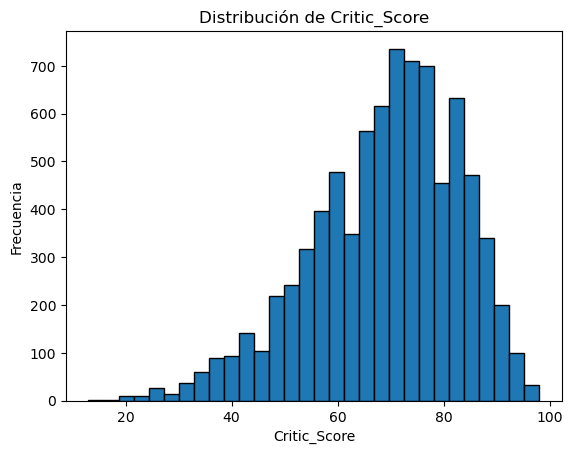

In [11]:
#Verificar si existen valores ausentes en esta columna
absents_critic_score = df['Critic_Score'].isna().sum()
print("Existen: ", absents_critic_score, "valores ausentes en la columna Critic_Score")

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_critic_score = df['Critic_Score'].max()
min_year_critic_score = df['Critic_Score'].min()

print("Valor máximo en 'Critic_Score':", max_year_critic_score)
print("Valor mínimo en 'Critic_Score':", min_year_critic_score)

print("---------------------------------------------------------------")

# Visualizar la distribución de los datos
plt.hist(df['Critic_Score'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de Critic_Score')
plt.xlabel('Critic_Score')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media y la mediana
mean_critic_score = df['Critic_Score'].mean()
median_critic_score = df['Critic_Score'].median()
print("Media de 'Critic_Score':", mean_critic_score)
print("Mediana de 'Critic_Score':", median_critic_score)

print("---------------------------------------------------------------")

# Reemplazar los valores ausentes con la mediana (como ejemplo)
df['Critic_Score'] = df['Critic_Score'].fillna(median_critic_score)

absents_critic_score = df['Critic_Score'].isna().sum()
print("Existen: ", absents_critic_score, "valores ausentes en la columna Critic_Score")

#### 1.7 User_Score

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de las columnas "User_Score" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>El tipo de dato de la columna es incorrecto, por lo cuál, se lo convirtió a tipo de dato flotante.</font>
- <font color='#613EF0'>Al tener una alta cantidad de datos ausentes en esta columna, se decidió reemplazar los valores ausentes con la mediana ya que la distribución de los datos mostró una distribución normal con un sesgo negativo significativo.</font>

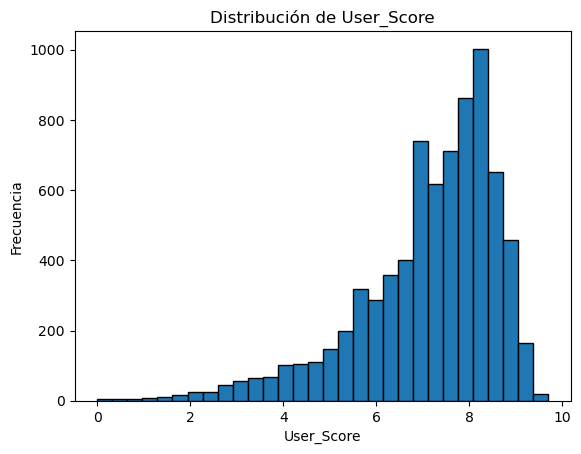

In [12]:
#Verificar si existen valores ausentes en esta columna
absents_user_score = df['User_Score'].isna().sum()
print("Existen: ", absents_user_score, "valores ausentes en la columna User_Score")

# Reemplazar valores problemáticos (por ejemplo, 'tbd') con NaN
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)

# Convertir la columna 'User_Score' a float
df['User_Score'] = df['User_Score'].astype(float)


print("---------------------------------------------------------------")

# Visualizar la distribución de los datos
plt.hist(df['User_Score'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de User_Score')
plt.xlabel('User_Score')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media y la mediana
mean_user_score = df['User_Score'].mean()
median_user_score = df['User_Score'].median()
print("Media de 'User_Score':", mean_user_score)
print("Mediana de 'User_Score':", median_user_score)

print("---------------------------------------------------------------")

# Reemplazar los valores ausentes con la mediana
df['User_Score'] = df['User_Score'].fillna(median_critic_score)

# Obtener el valor máximo y mínimo de la columna 'NA_sales'
max_year_user_score = df['User_Score'].max()
min_year_user_score = df['User_Score'].min()

print("Valor máximo en 'User_Score':", max_year_user_score)
print("Valor mínimo en 'User_Score':", min_year_user_score)


#### 1.8 Rating

##### Corrección de datos

<font color='#613EF0'>Luego de realizar las correcciones de las columnas "Rating" del Dataframe, se concluyó lo siguiente:</font>

- <font color='#613EF0'>Existen muchos valores ausentes por lo cuál lo mejor es nombrar una nuevo ranking como "unknown".</font>


In [13]:
#Verificar si existen valores ausentes en esta columna
absents_rating = df['Rating'].isna().sum()
print("Existen: ", absents_rating, "valores ausentes en la columna Rating")

print("---------------------------------------------------------------")

# Reemplazar valores ausentes en la columna 'Name' con "unknown"
df['Rating'] = df['Rating'].fillna('unknown')

# Verificar los valores únicos en la columna 'Rating'
unique_rating = df['Rating'].unique()
print("Valores únicos en 'Rating':", unique_rating)

#### 1.9 Total_Sales

##### Enriquecimiento de datos

<font color='#613EF0'>La creación de esta nueva columna, es necesaria ya que, se en algunos futuros analisis se necesitará el total de las ventas de cada videojuego.</font>


In [14]:
# Crear la columna 'Total_Sales' sumando las columnas de ventas regionales
df['Total_Sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']

# Verificar los primeros registros para asegurarse de que la columna se ha creado correctamente
print(df.head())

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

## Analisis de los datos

### Análisis de Ventas

#### Juegos lanzados en diferentes años

<font color='#613EF0'>Al observar la gráfica de la cantidad de juegos lanzados en diferentes años, se puede observar que la desición de colocar en 0 los años de juegos que tenían este dato ausente fue acertada, pues se puede observar de mejor manera los datos que no se tomarán en cuenta luego del análisis.</font>

<font color='#613EF0'>Se puede decir que entre el periodo de 2008 y 2009, las empresas lanzarón la mayor cantidad de juegos, quiza con el fin de hacerse reconocer y dominar este mercado.</font>

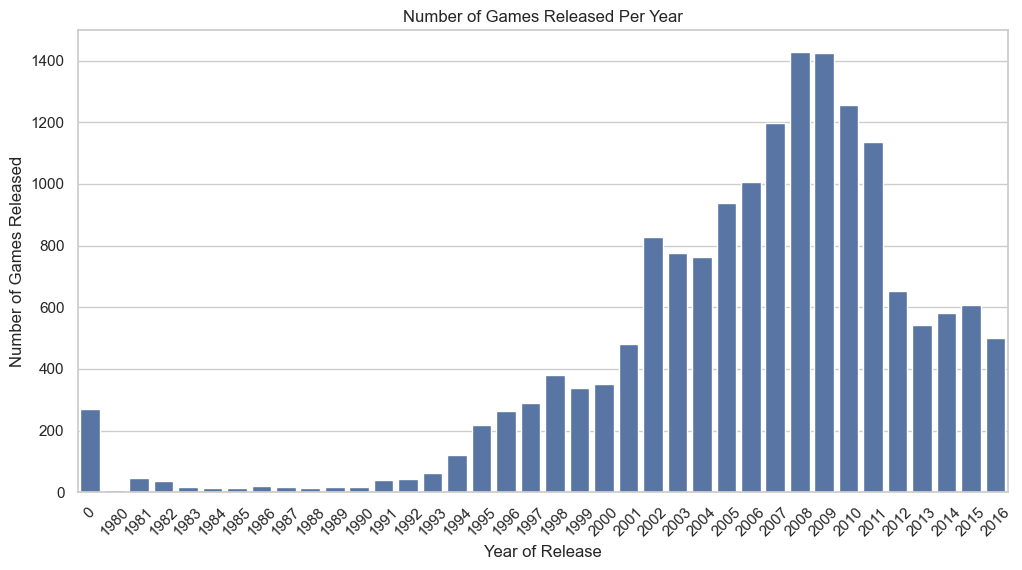

In [15]:
# Contar el número de juegos lanzados por año
games_per_year = df['Year_of_Release'].value_counts().sort_index()

#Mostar los resultados
#print(games_per_year)

#Configuración del estilo de gráfico con seaborn
sns.set(style="whitegrid")

#Crear un gráfico de barras con pyplot para una mejor visualización de los datos
plt.figure(figsize=(12,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color="b")

#Configuración de etiquetas y títulos del gráfico
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Per Year')
plt.xticks(rotation=45)

#Mostar el gráfico
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

#### Diferencia de ventas entre plataformas

- <font color='#613EF0'>Plataformas como 'ps2', 'x360', 'ps3' y 'wii', dominaron en ventas durante un periodo de 11 o 10 años. Sin embargo, estas plataformas junto al 'ds', 'ps' y 'psp', solían ser polpulares pero en los ultimos años ya no tienen ventas considerables.</font>

- <font color='#613EF0'>Las plataformas relativamente nuevas considerando a las plataformas del 2010 para arriba, tienen a durar menos de 5 años en el mercado, mientras que las plataformas antiguas como ps2, ps3, wii, entre otras, tienen a durar más de 10 años. Por otro lado, la plataforma que mas ha durado a lo largo del tiempo es 'pc'.</font>

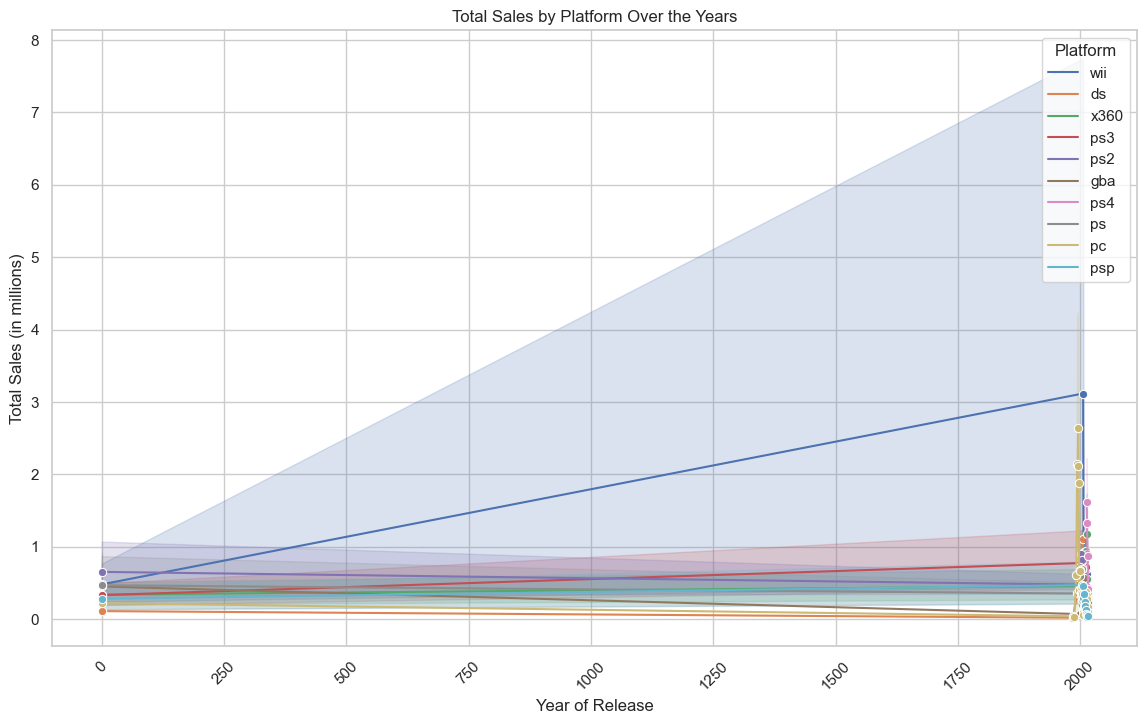

In [16]:
# Calcular las ventas totales por plataform
total_sales_by_platform = df.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)

#Mostar las plataformas con mayores ventas totales
print(total_sales_by_platform)

print("---------------------------------------------------------------")

#Seleccionar las plataformas con mayores ventas totales
top_platform = total_sales_by_platform.head(10).index

#Filtrar el Dataframe para incluir solo las plataformas seleccionadas 
df_top_platform = df[df['Platform'].isin(top_platform)]

print("---------------------------------------------------------------")

# Crear un gráfico de líneas para mostrar la distribución de ventas de las plataformas seleccionadas a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_platform, x='Year_of_Release', y='Total_Sales', hue='Platform', marker='o')
# Configurar las etiquetas y el título del gráfico
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Platform Over the Years')
plt.legend(title='Platform')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

print("---------------------------------------------------------------")

# Filtar plataformas que no tienen ventas en los últimos años
recent_years = df['Year_of_Release'].max() - 5
platforms_no_sales_recently = df[df['Year_of_Release'] <= recent_years]['Platform'].value_counts().index

#Mostar plataformas sin ventas recientes
print("Plataformas que solían ser populares pero ahora no tienen ventas recientes: ")
print(platforms_no_sales_recently)

print("---------------------------------------------------------------")

# Calcular el primer y último año de lanzamiento para cada plataforma excluyendo valores 0 y NaN
platform_lifetime = df[(df['Year_of_Release'] > 0)].groupby('Platform')['Year_of_Release'].agg(['min', 'max'])

#Calcular el tiempo de vida de cada plataforma
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']

#Mostar el tiempo de vida de las plataformas
print(platform_lifetime.sort_values(by='lifetime', ascending=False))

#### Construir un modelo para 2017

- <font color='#613EF0'>Si se selecciona solo los datos de los años 2015 y 2016, se podrá observar una tendencia actual del mercado, respecto a plataformas y videojuegos. Sin embargo, las industria de los videojuegos evoluciona rápidamente, y podría no ser muy acertado en lo que se va a invertir.</font>

- <font color='#613EF0'>Si se selecciona un rango más amplio 2010 - 2016, ayuda a identificar patrones a largo plazo y tendencias cíclicas. De esta manera se capturará periodos de estabilidad como de variabilidad en el mercado. Por lo cuál, se utilizará este rango de años para predecir si un juego tendrá éxito o no para el 2017.</font>

In [17]:
#Filtar el Dataframe para incluir solo los datos con Year_of_Release >= 2010
new_df = df[df['Year_of_Release'] >= 2010]

#Verificar las primeras filas del nuevo Dataframe filtrado
print(new_df.head(10))

# Verificar el tamaño del nuevo DataFrame filtrado
print(f"El nuevo DataFrame tiene {new_df.shape[0]} filas y {new_df.shape[1]} columnas.")

#### Plataformas líderes en ventas

- <font color='#613EF0'>Las plataformas líderes en venta desde el 2010 al año 2016 son ps3 y x360.</font>

- <font color='#613EF0'>Sin embargo, el ps3 es una de las plataformas que están en declive y plataformas como el '3ds', 'ps4', 'psv', 'wiiu', y 'xone' están ganando puesto en el mercado, gracias al crecimiento en ventas que poseen.</font>

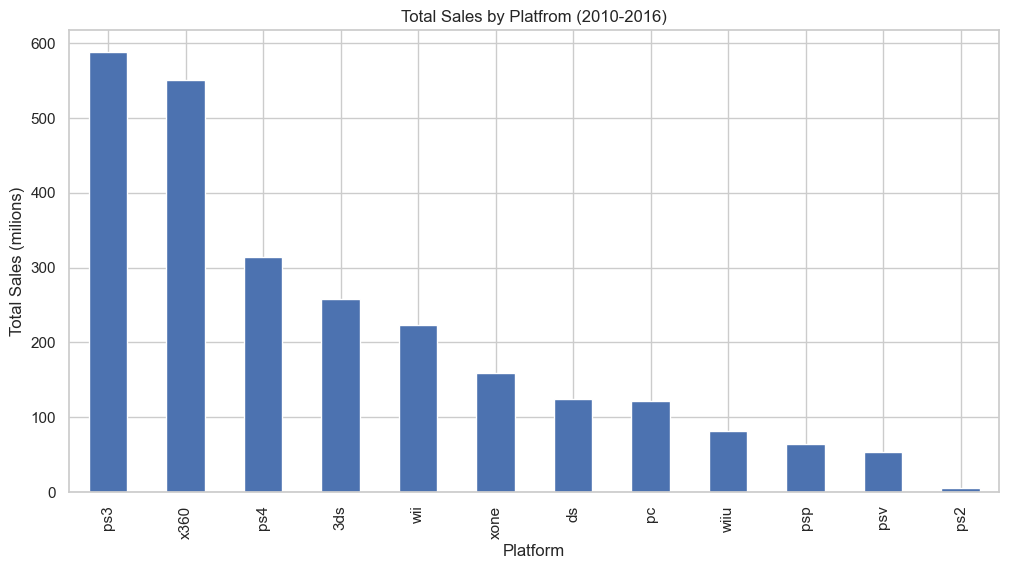

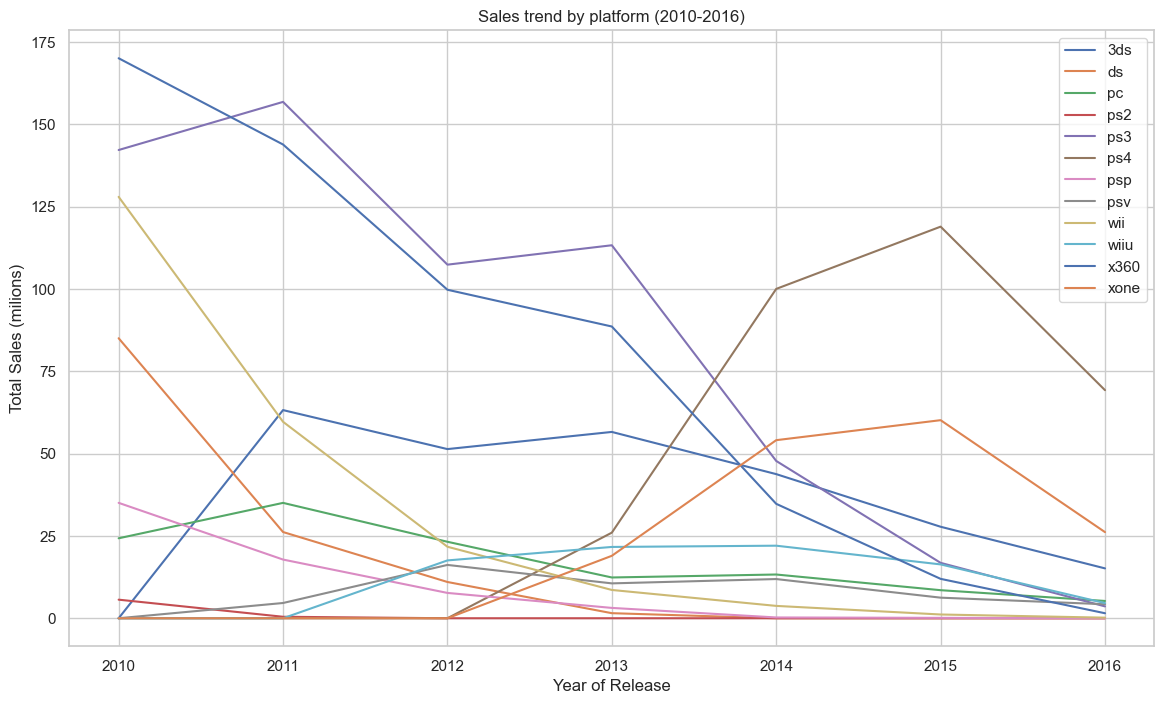

In [18]:
# Calcular las ventas totales por plataforma
platform_sales = new_df.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)

#Visualizar las ventas totales por plataforma
plt.figure(figsize=(12,6))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platfrom (2010-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (milions)')
plt.show()

print("---------------------------------------------------------------")

#Calcular las ventas por plataforma por año
platform_sales_year = new_df.groupby(['Year_of_Release','Platform'])['Total_Sales'].sum().unstack().fillna(0)

#Visualizar las tendencias de ventas por plataforma a lo largo de los años
plt.figure(figsize=(14,8))
for platform in platform_sales_year.columns:
    plt.plot(platform_sales_year.index, platform_sales_year[platform], label=platform)
plt.title('Sales trend by platform (2010-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (milions)')
plt.legend()
plt.show()

#Calcular el crecimiento anual promedio por plataforma
growth_rate = platform_sales_year.pct_change().mean() * 100

#Identificar las plataformas con mayor crecimiento y declive
growing_platforms = growth_rate[growth_rate > 0].sort_values(ascending=False)
declining_platforms = growth_rate[growth_rate < 0].sort_values()

print("Plataformas con mayor crecimiento anual promedio:")
print(growing_platforms)

print("\nPlataformas en declive anual promedio:")
print(declining_platforms)

# Seleccionar plataformas potencialmente rentables (mayor crecimiento)
potentially_profitable_platforms = growing_platforms.index[:5]
print("\nPlataformas potencialmente rentables:")
print(potentially_profitable_platforms)

#### Ventas globales y sus diferencias

- <font color='#613EF0'>Luego de observar el diagrama de caja se puede mencionar que las ventas globales del x360 y ps3 son bastante significativas frente a las demas plataformas.</font>

- <font color='#613EF0'>Las ventas promedios de varias plataformas son casi iguales sobretodo para las plataformas potenciablemente rentables. Además, las ventas promedios son menos de 1 millon de dólares.</font>

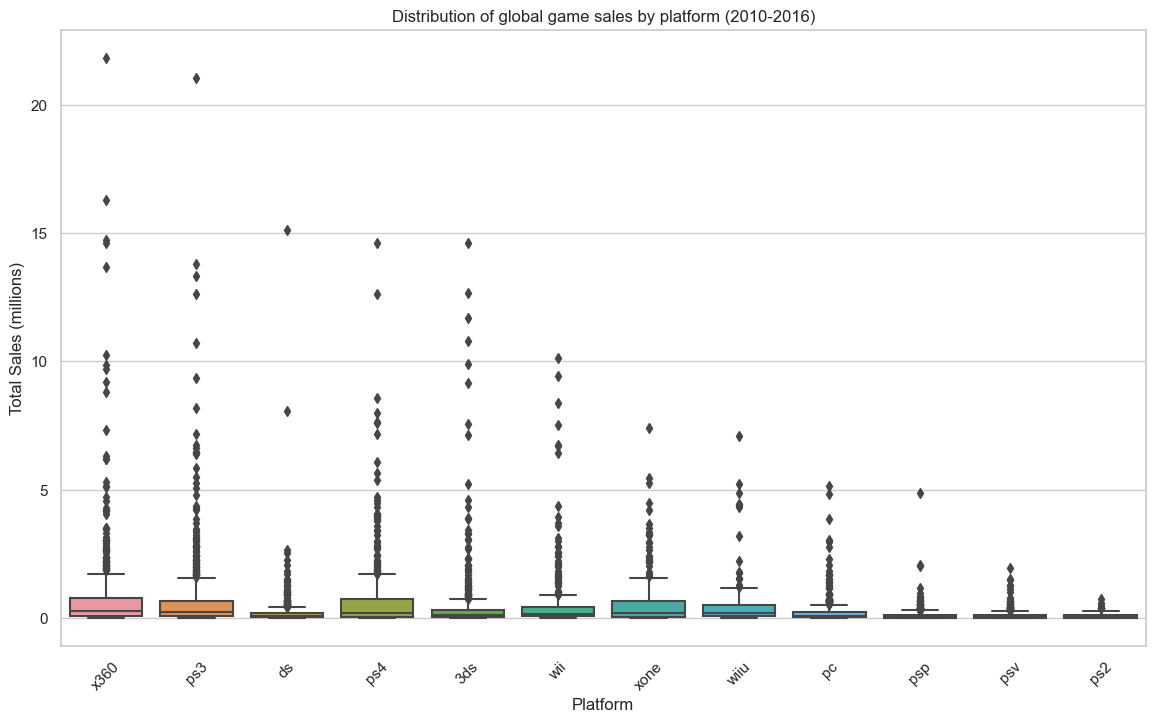

In [19]:
# Crear el diagrama de caja
plt.figure(figsize=(14,8))
sns.boxplot(x='Platform', y='Total_Sales', data=new_df)
plt.title('Distribution of global game sales by platform (2010-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

#### ¿Las reseñas de usuarios y profesionales afectan las ventas de una plataforma? 

- <font color='#613EF0'>Luego de observar los diagramas de dispersión se puede deducir que las criticas de los expertos si tiene un impacto sobre las ventas, por otro lado, las criticas de los usuarios no tiene un impacto fuerte en las ventas.</font>

- <font color='#613EF0'>La correlación de las ventas con las puntuación de los criticos en los videojuegos es de 0.30, lo que indica una relación positiva moderada, es decir, que los juegos que reciben mejores criticas tienden a vender más, aun que la relación no es muy fuerte.</font>

- <font color='#613EF0'>La correlación de las ventas con las puntuación de los usuarios en los videojuegos es de -0.18, lo que indica una relación negativa débil, es decir, que las ventas tienen a ser ligeramente menores a medida que las puntuaciones de los usuarios aumentan, pero está relación es débil.</font>

- <font color='#613EF0'>Dado que las criticas de profesionales tienen una correlación positiva moderada con las ventas, puede ser beneficioso enfocarse en obtener buenas críticas de los criticos para impulsar las ventas.</font>

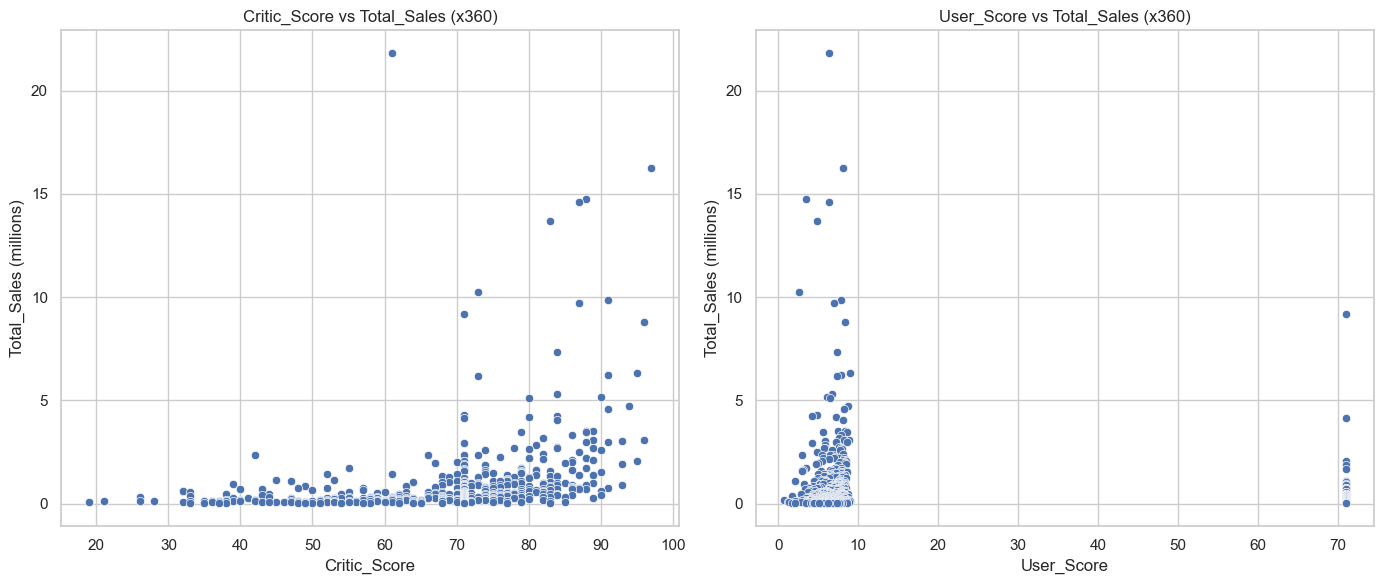

In [20]:
# Filtar los datos para la plataforma x360
df_x360 = new_df[new_df['Platform'] == 'x360']

#Crear gráficos de dispersión para la relación entre las reseñas y las ventas
plt.figure(figsize=(14,6))

#Gráfico de dispersión para Critic_Score vs Total_Sales
plt.subplot(1,2,1)
sns.scatterplot(data=df_x360, x='Critic_Score', y='Total_Sales')
plt.title('Critic_Score vs Total_Sales (x360)')
plt.xlabel('Critic_Score')
plt.ylabel('Total_Sales (millions)')

#Gráfico de dispersión para User_Score vs Total_Sales
plt.subplot(1,2,2)
sns.scatterplot(data=df_x360, x='User_Score', y='Total_Sales')
plt.title('User_Score vs Total_Sales (x360)')
plt.xlabel('User_Score')
plt.ylabel('Total_Sales (millions)')

plt.tight_layout()
plt.show()

#Calcular la correlación entre las reseñas y las ventas
correlation_critic = df_x360['Critic_Score'].corr(df_x360['Total_Sales'])
correlation_user = df_x360['User_Score'].corr(df_x360['Total_Sales'])

print(f"Correlación entre Critic_Score y Total_Sales (x360): {correlation_critic:.2f}")
print(f"Correlación entre User_Score y Total_Sales (x360): {correlation_user:.2f}")

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

#### Distribución general de los juegos por género

- <font color='#613EF0'>Al observar la gráfica de distribución de ventas por género, se puede decir que los géneros más rentables son action, shooter y sports. Donde los juegos de acción alcanzan los 673.09 millones de dólares en sus ganancias. </font>

- <font color='#613EF0'>Los juegos de acción y disparos dominan las ventas, lo que sugiere que los jugadores están interesados en experiencias intensas y dinámicas. Los juegos de deportes y role-playing pueden no ser tan rentables en terminos de ventas totales, pero pueden ser sostenibles y exitosos dentro de sus comunidades.</font>

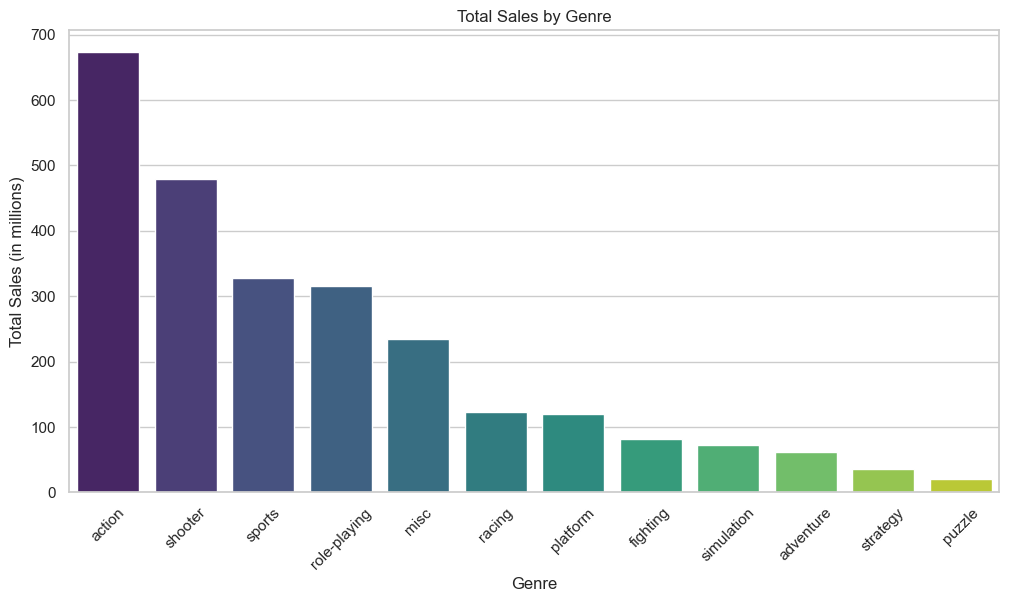

In [21]:
# Agrupar los datos por género y calcular las ventas totales
genre_sales = new_df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

#Plotear la distribución de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()

#Mostar la tabla con los géneros y sus ventas totales
genre_sales_df = genre_sales.reset_index()
print(genre_sales_df)

### Análisis de Regiones

#### Cuotas de mercado de una región a otra

- <font color='#613EF0'>Al observar las distintas gráficas en la región de Norte America las 5 plataformas principales son: x360, ps3, wii, ps4, y xone; en Europa son: ps3, x360, ps4, pc y wii; y en Japon son: 3ds, ps3, psp, ds y psv.</font>

- <font color='#613EF0'> X360 es extremadamente popular en NA, pero tiene una cuota de mercado insignificante en JP. </font>
- <font color='#613EF0'> PS3 es popular en todas las regiones, pero su cuota de mercado varía. </font>
- <font color='#613EF0'> Las plataformas portátiles como DS y PSP tienen una mayor cuota de mercado en JP comparado con NA y EU. </font>

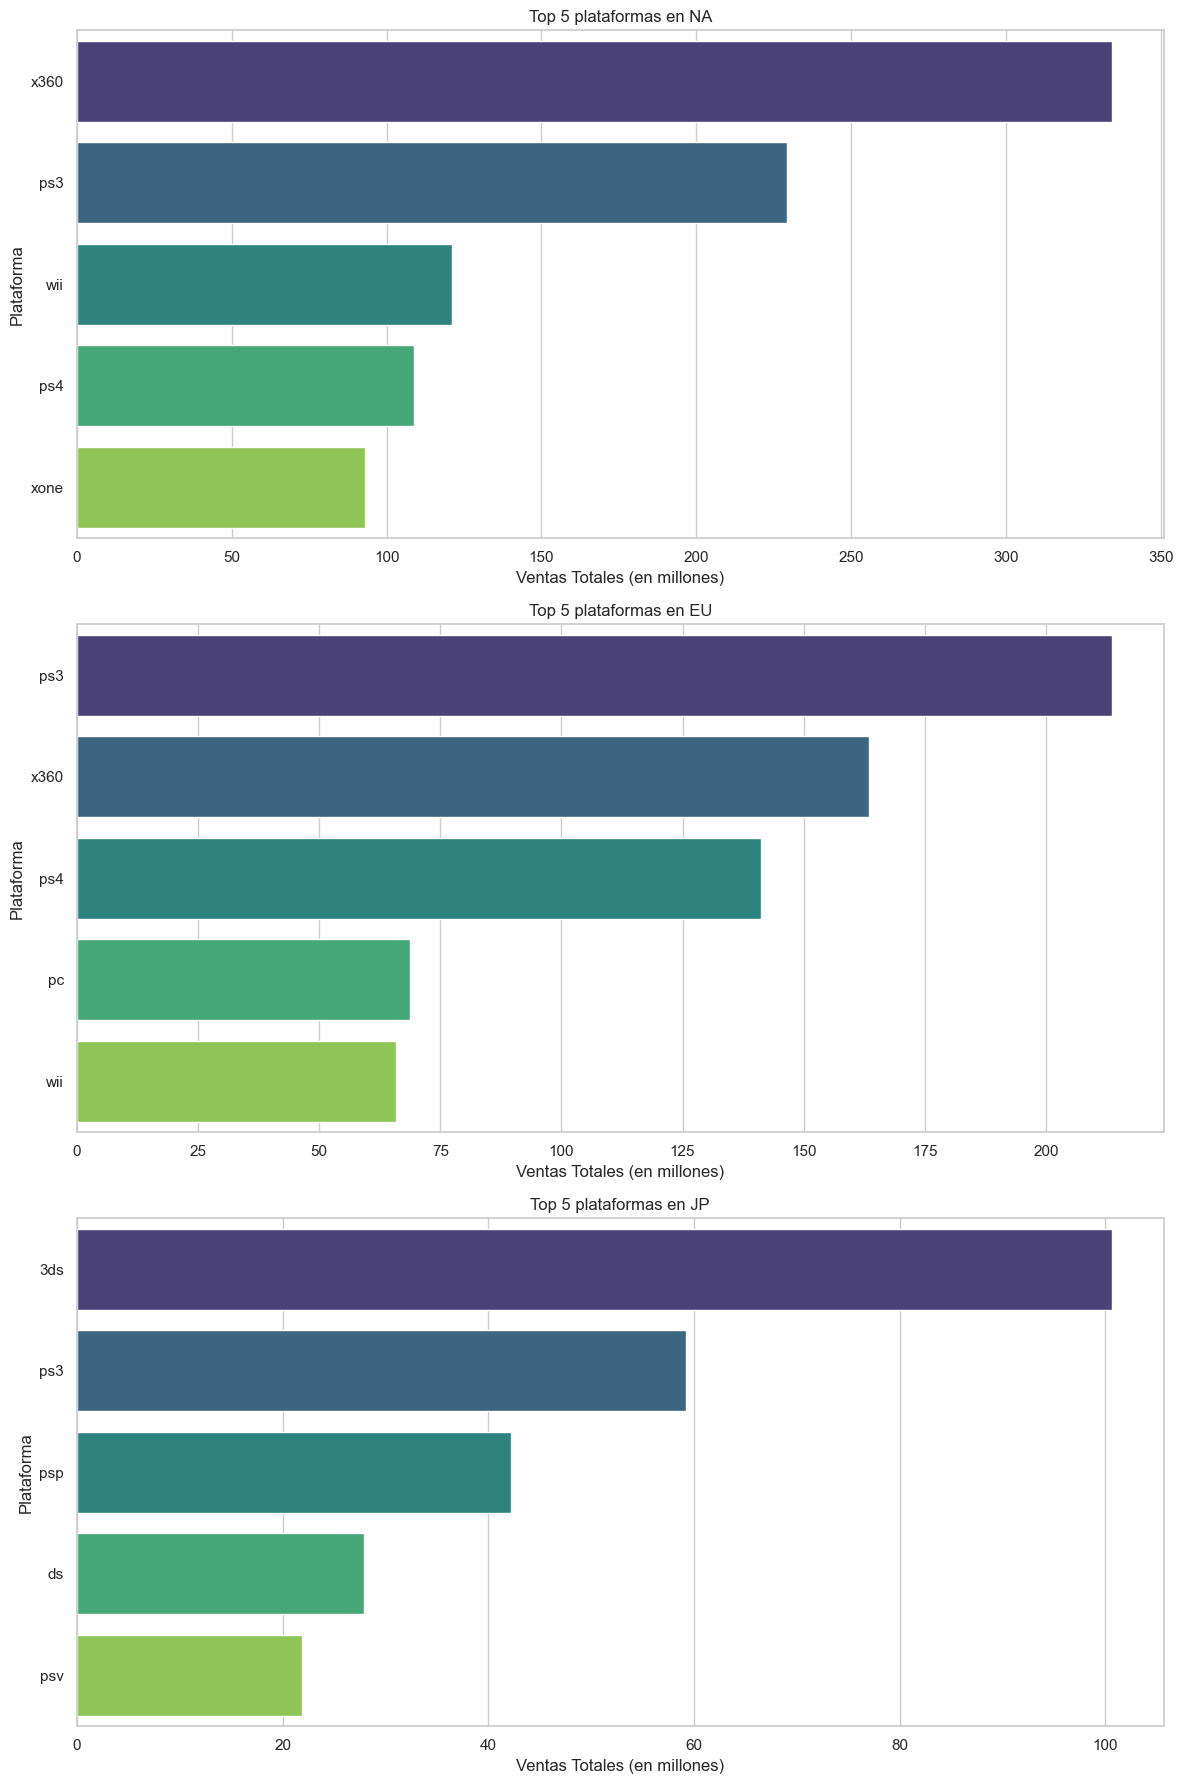

In [22]:
#Agrupar los datos por plataforma y calcular las ventas totales en cada región
platform_sales_na = new_df.groupby('Platform')['NA_sales'].sum().sort_values(ascending=False)
platform_sales_eu = new_df.groupby('Platform')['EU_sales'].sum().sort_values(ascending=False)
platform_sales_jp = new_df.groupby('Platform')['JP_sales'].sum().sort_values(ascending=False)

#Mostrar las plataformas principales en cada región
top5_na = platform_sales_na.head(5)
top5_eu = platform_sales_eu.head(5)
top5_jp = platform_sales_jp.head(5)

print("Top 5 plataformas en NA:\n", top5_na)
print("Top 5 plataformas en EU:\n", top5_eu)
print("Top 5 plataformas en JP:\n", top5_jp)

print("---------------------------------------------------------")

# Crear gráficos de barras para cada región
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico para NA
sns.barplot(x=top5_na.values, y=top5_na.index, palette="viridis", ax=axs[0])
axs[0].set_title('Top 5 plataformas en NA')
axs[0].set_xlabel('Ventas Totales (en millones)')
axs[0].set_ylabel('Plataforma')

# Gráfico para EU
sns.barplot(x=top5_eu.values, y=top5_eu.index, palette="viridis", ax=axs[1])
axs[1].set_title('Top 5 plataformas en EU')
axs[1].set_xlabel('Ventas Totales (en millones)')
axs[1].set_ylabel('Plataforma')

# Gráfico para JP
sns.barplot(x=top5_jp.values, y=top5_jp.index, palette="viridis", ax=axs[2])
axs[2].set_title('Top 5 plataformas en JP')
axs[2].set_xlabel('Ventas Totales (en millones)')
axs[2].set_ylabel('Plataforma')

plt.tight_layout()
plt.show()

print("---------------------------------------------------------")

# Crear un dataframe con las ventas totales por región
total_sales_by_region = new_df.groupby('Platform')[['NA_sales', 'EU_sales', 'JP_sales']].sum()

# Calcular las cuotas de mercado
total_sales_by_region['Total_Sales'] = total_sales_by_region.sum(axis=1)
total_sales_by_region['NA_share'] = total_sales_by_region['NA_sales'] / total_sales_by_region['Total_Sales']
total_sales_by_region['EU_share'] = total_sales_by_region['EU_sales'] / total_sales_by_region['Total_Sales']
total_sales_by_region['JP_share'] = total_sales_by_region['JP_sales'] / total_sales_by_region['Total_Sales']

# Filtrar las plataformas principales en cada región
top_platforms = pd.concat([top5_na, top5_eu, top5_jp]).index.unique()
top_platforms_shares = total_sales_by_region.loc[top_platforms]

print(top_platforms_shares[['NA_share', 'EU_share', 'JP_share']])


#### Generos principales en cada región

- <font color='#613EF0'>Los géneros Action, Shooter y Sports son los más populares en NA y EU.</font>
- <font color='#613EF0'>Los géneros Role-playing, Action y Mics son los más populares en JP. Siendo role-playing extremadamente popular en JP con una cuota de mercadao significativamente mayor en comparación con NA y Eu.</font>

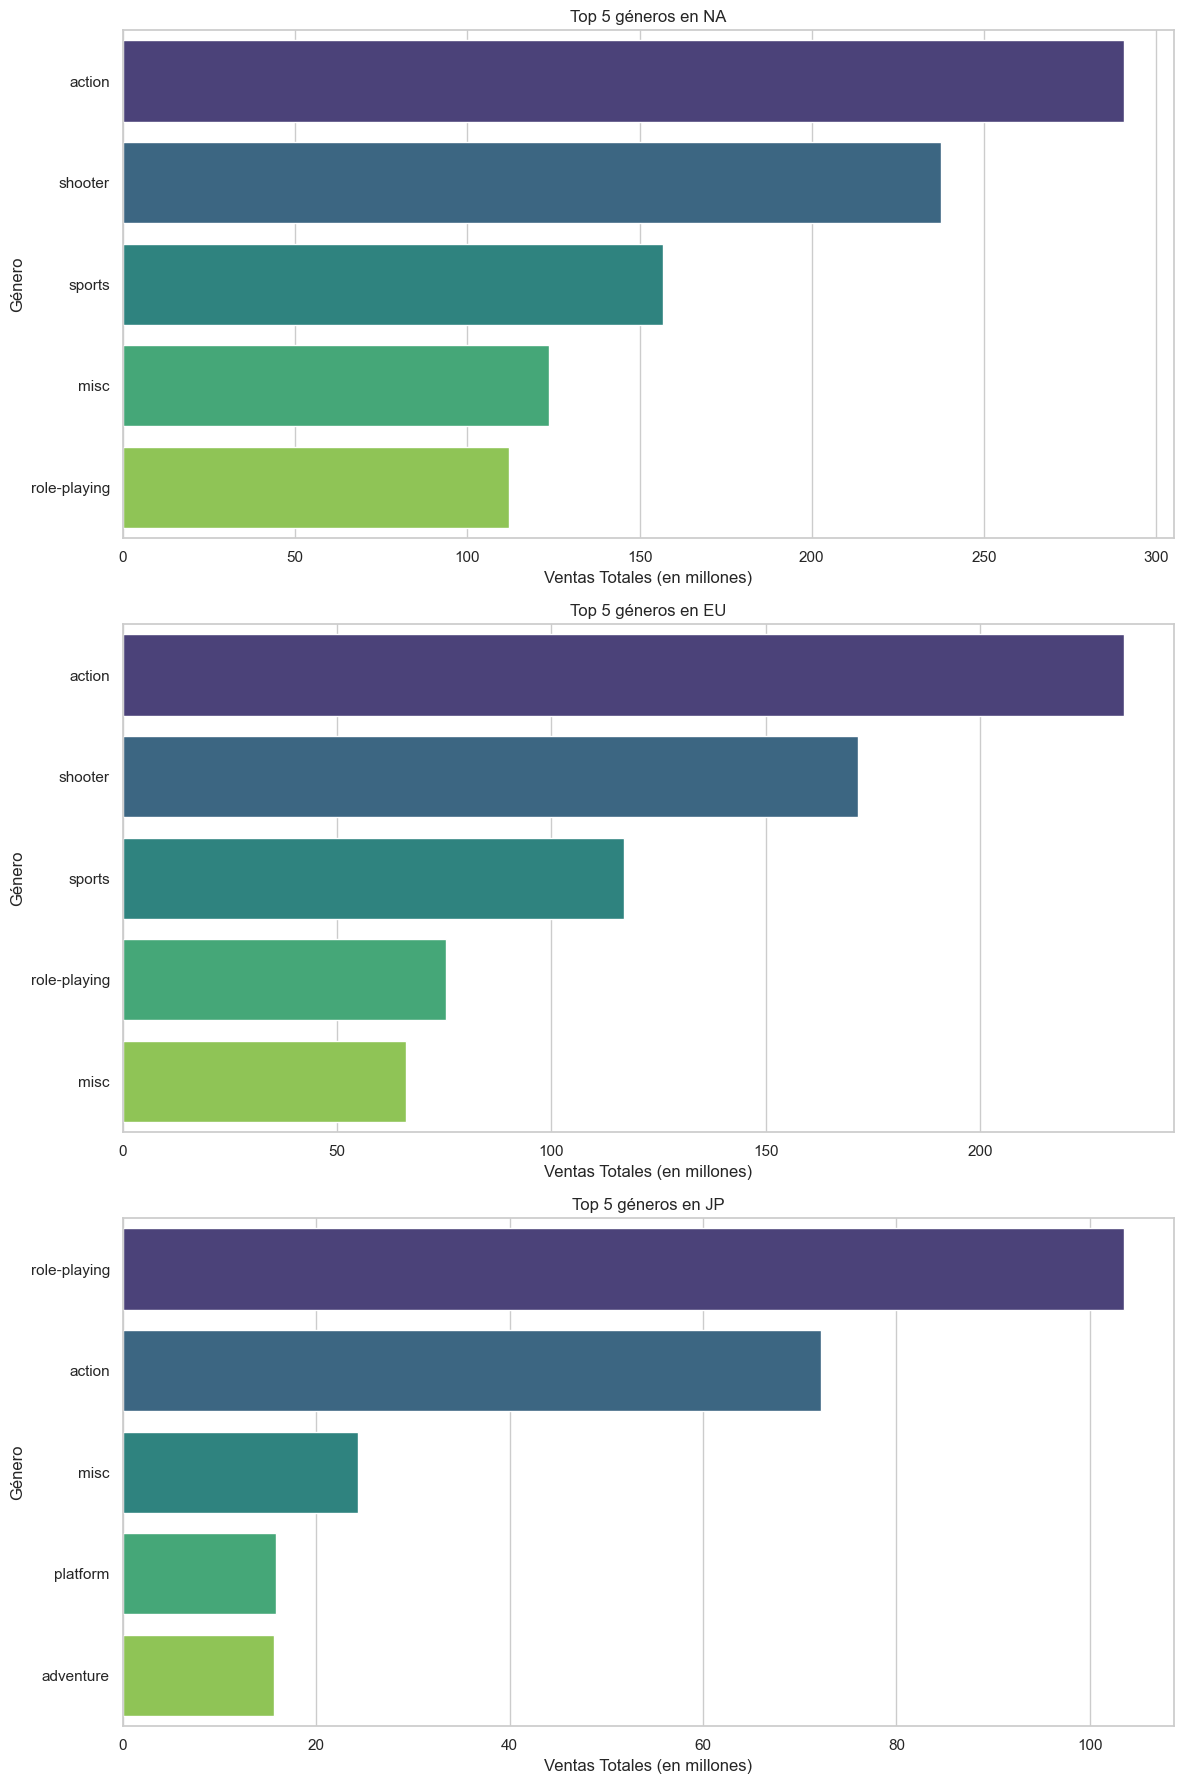

In [23]:
# Agrupar los datos por género y calcular las ventas totales en cada región
genre_sales_na = new_df.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False)
genre_sales_eu = new_df.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False)
genre_sales_jp = new_df.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False)

# Mostrar los géneros principales en cada región
top5_genres_na = genre_sales_na.head(5)
top5_genres_eu = genre_sales_eu.head(5)
top5_genres_jp = genre_sales_jp.head(5)

print("Top 5 géneros en NA:\n", top5_genres_na)
print("Top 5 géneros en EU:\n", top5_genres_eu)
print("Top 5 géneros en JP:\n", top5_genres_jp)

print("---------------------------------------------------------")

# Crear gráficos de barras para cada región
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico para NA
sns.barplot(x=top5_genres_na.values, y=top5_genres_na.index, palette="viridis", ax=axs[0])
axs[0].set_title('Top 5 géneros en NA')
axs[0].set_xlabel('Ventas Totales (en millones)')
axs[0].set_ylabel('Género')

# Gráfico para EU
sns.barplot(x=top5_genres_eu.values, y=top5_genres_eu.index, palette="viridis", ax=axs[1])
axs[1].set_title('Top 5 géneros en EU')
axs[1].set_xlabel('Ventas Totales (en millones)')
axs[1].set_ylabel('Género')

# Gráfico para JP
sns.barplot(x=top5_genres_jp.values, y=top5_genres_jp.index, palette="viridis", ax=axs[2])
axs[2].set_title('Top 5 géneros en JP')
axs[2].set_xlabel('Ventas Totales (en millones)')
axs[2].set_ylabel('Género')

plt.tight_layout()
plt.show()

print("---------------------------------------------------------")

# Crear un dataframe con las ventas totales por región
total_sales_by_genre = new_df.groupby('Genre')[['NA_sales', 'EU_sales', 'JP_sales']].sum()

# Calcular las cuotas de mercado
total_sales_by_genre['Total_Sales'] = total_sales_by_genre.sum(axis=1)
total_sales_by_genre['NA_share'] = total_sales_by_genre['NA_sales'] / total_sales_by_genre['Total_Sales']
total_sales_by_genre['EU_share'] = total_sales_by_genre['EU_sales'] / total_sales_by_genre['Total_Sales']
total_sales_by_genre['JP_share'] = total_sales_by_genre['JP_sales'] / total_sales_by_genre['Total_Sales']

# Filtrar los géneros principales en cada región
top_genres = pd.concat([top5_genres_na, top5_genres_eu, top5_genres_jp]).index.unique()
top_genres_shares = total_sales_by_genre.loc[top_genres]

print(top_genres_shares[['NA_share', 'EU_share', 'JP_share']])

#### Las clasificaciones de ESRB afectan a las ventas en regiones individuales

- <font color='#613EF0'>En NA y Eu, los juegos con clasificación E (Everyone) tienen las mayores ventas, seguidos de las clasificaciones M (Mature) y T (Teen).</font>
- <font color='#613EF0'>En JP, los juegos con clasificación E también tienen las mayores ventas, pero las ventas generales son más bajas en comparación con NA y EU.</font>

- <font color='#613EF0'> La correlación es ligeramente positiva en NA, lo que indica que hay una pequeña tendencia a que las ventas aumenten con clasificaciones ESRB más altas. Sin embargo, la correlación es muy baja, lo que sugiere que la clasificación ESRB no es un factor determinante significativo para las ventas en esta región.</font>

- <font color='#613EF0'> Similar a NA, hay una ligera correlación positiva, sugiriendo que en Europa, las clasificaciones ESRB más altas podrían estar asociadas con un leve incremento en las ventas.</font>

- <font color='#613EF0'> La correlación es prácticamente nula, indicando que en Japón, la clasificación ESRB no tiene una relación significativa con las ventas de videojuegos. Esto puede reflejar diferencias culturales en la percepción y consumo de videojuegos en Japón en comparación con Occidente.</font>

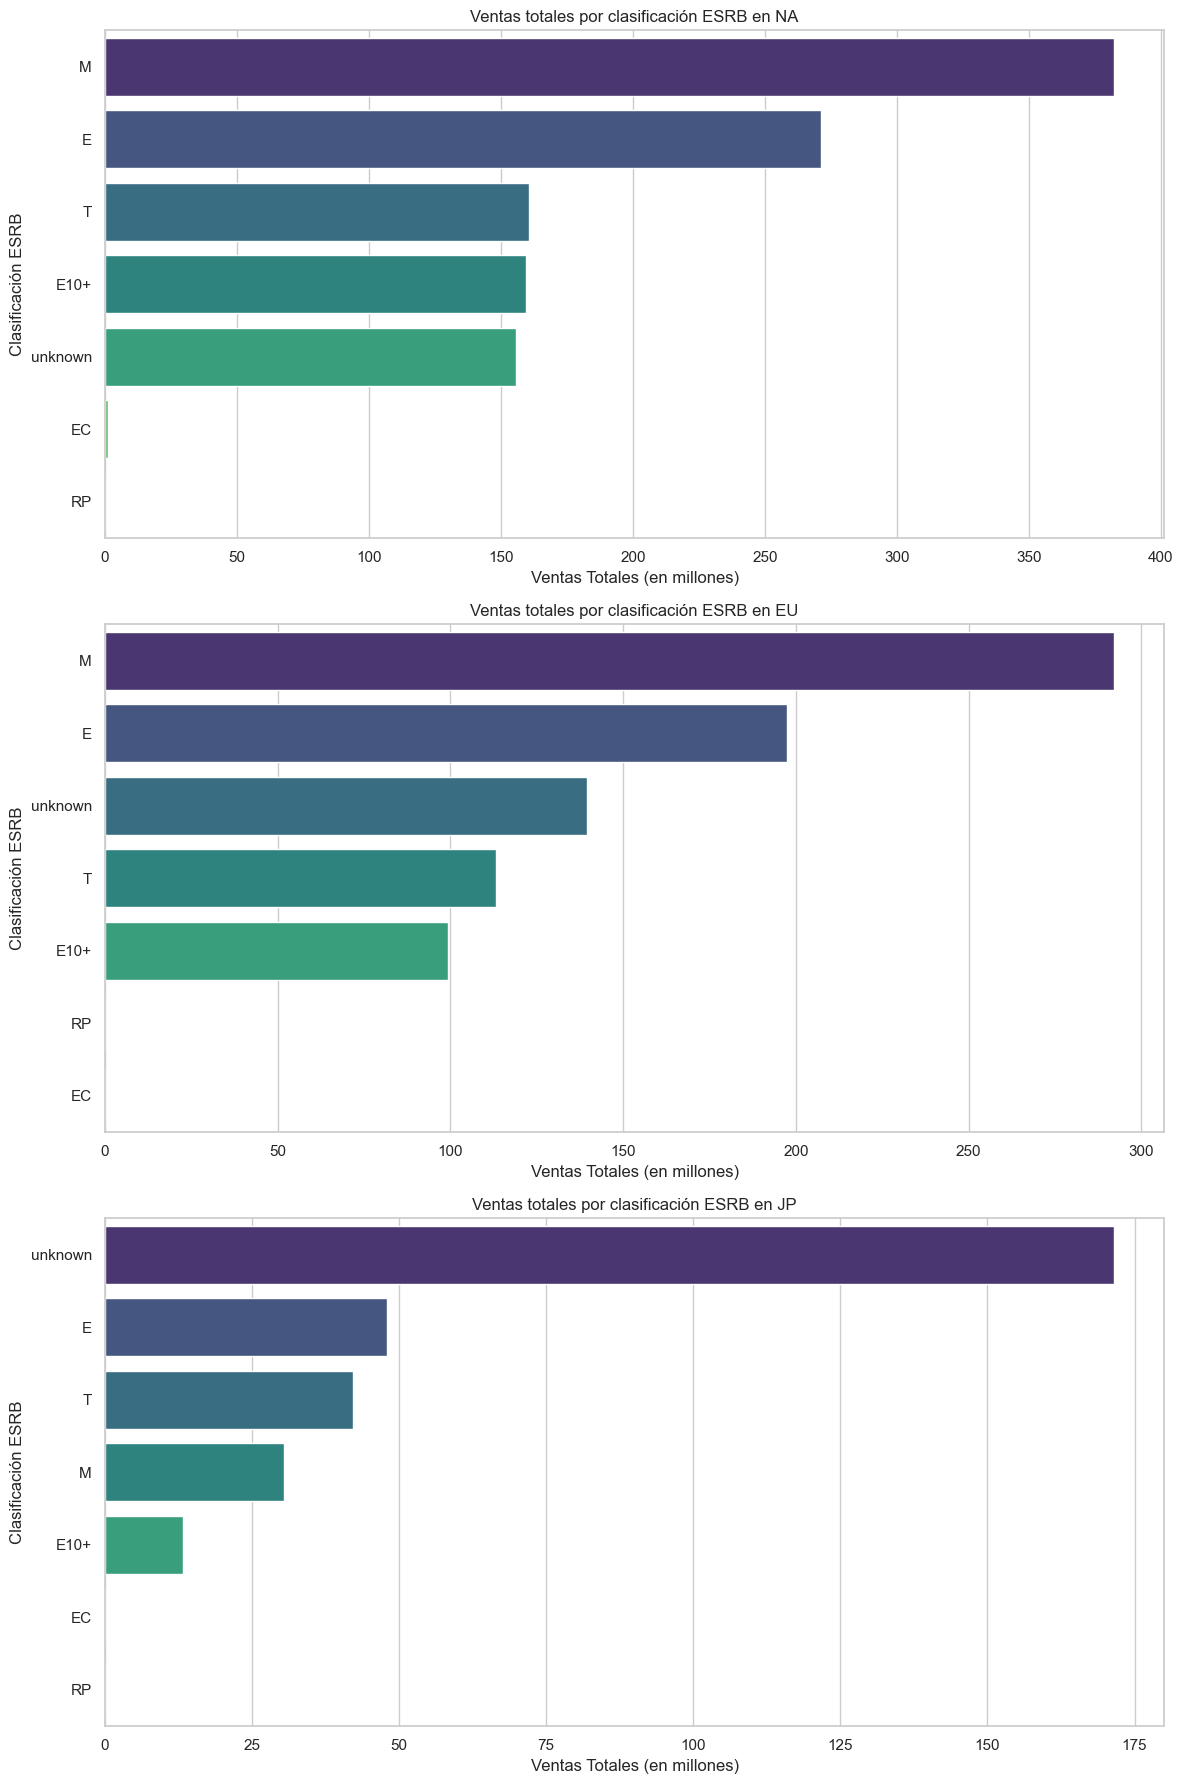

In [24]:
# Agrupar los datos por clasificación ESRB y calcular las ventas totales en cada región
esrb_sales_na = new_df.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = new_df.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = new_df.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False)

print("Ventas totales por clasificación ESRB en NA:\n", esrb_sales_na)
print("Ventas totales por clasificación ESRB en EU:\n", esrb_sales_eu)
print("Ventas totales por clasificación ESRB en JP:\n", esrb_sales_jp)

print("---------------------------------------------------------")

# Crear gráficos de barras para cada región
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico para NA
sns.barplot(x=esrb_sales_na.values, y=esrb_sales_na.index, palette="viridis", ax=axs[0])
axs[0].set_title('Ventas totales por clasificación ESRB en NA')
axs[0].set_xlabel('Ventas Totales (en millones)')
axs[0].set_ylabel('Clasificación ESRB')

# Gráfico para EU
sns.barplot(x=esrb_sales_eu.values, y=esrb_sales_eu.index, palette="viridis", ax=axs[1])
axs[1].set_title('Ventas totales por clasificación ESRB en EU')
axs[1].set_xlabel('Ventas Totales (en millones)')
axs[1].set_ylabel('Clasificación ESRB')

# Gráfico para JP
sns.barplot(x=esrb_sales_jp.values, y=esrb_sales_jp.index, palette="viridis", ax=axs[2])
axs[2].set_title('Ventas totales por clasificación ESRB en JP')
axs[2].set_xlabel('Ventas Totales (en millones)')
axs[2].set_ylabel('Clasificación ESRB')

plt.tight_layout()
plt.show()

print("---------------------------------------------------------")

# Convertir las clasificaciones ESRB a valores numéricos
esrb_mapping = {'E': 1, 'E10+': 2, 'T': 3, 'M': 4, 'AO': 5, 'EC': 6, 'RP': 7}
new_df['ESRB_Numeric'] = new_df['Rating'].map(esrb_mapping)

# Calcular la correlación entre las clasificaciones ESRB y las ventas en cada región
correlation_na = new_df['ESRB_Numeric'].corr(new_df['NA_sales'])
correlation_eu = new_df['ESRB_Numeric'].corr(new_df['EU_sales'])
correlation_jp = new_df['ESRB_Numeric'].corr(new_df['JP_sales'])

print(f"Correlación entre clasificación ESRB y ventas en NA: {correlation_na:.2f}")
print(f"Correlación entre clasificación ESRB y ventas en EU: {correlation_eu:.2f}")
print(f"Correlación entre clasificación ESRB y ventas en JP: {correlation_jp:.2f}")

## Pruebas de Hipótesis

### ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales?

#### Procedimiento

<font color='#613EF0'>Para probar esta hipótesis se debe realizar una prueba t para dos muestras independienties para comparar las medias de las clasificaciones de los usuarios para las dos plataformas.</font>

- <font color='#613EF0'>Hipótesis nula (H0): Las clasificaciones promedio de los usuarios para Xbox One y Pc son iguales</font>

- <font color='#613EF0'>Hipótesis alternativa (H1): Las clasificaciones promedio de los usuarios para Xbox One y Pc son diferentes</font>

In [25]:
# Filtramos los datos para Xbox One y PC
xbox_one_scores = new_df[new_df['Platform'] == 'xone']['User_Score'].dropna().astype(float)
pc_scores = new_df[new_df['Platform'] == 'pc']['User_Score'].dropna().astype(float)

#Realizamos la prueba t parta dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)  # equal_var=False para la prueba t de varianzas desiguales

# Imprimimos los resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Decisión basada en el valor p
alpha = 0.04
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<font color='#613EF0'>Debido a un valor p aproximado de 0.194 no se puede rechazar la hipótesis nula, sugiere que no existe evidencia suficiente para afirmar que las calificaciones promedio de los usuarios son diferentes entre las dos plataformas. </font>

### ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes?

#### Procedimiento

<font color='#613EF0'>Para probar esta hipótesis se debe realizar una prueba t para dos muestras independienties para comparar las medias de las clasificaciones de los usuarios entre los dos géneros.</font>

- <font color='#613EF0'>Hipótesis nula (H0): Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.</font>

- <font color='#613EF0'>Hipótesis alternativa (H1): Las clasificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.</font>

In [26]:
# Filtramos los datos para los géneros Acción y Deportes
action_scores = new_df[new_df['Genre'] == 'action']['User_Score'].dropna().astype(float)
sports_scores = new_df[new_df['Genre'] == 'sports']['User_Score'].dropna().astype(float)

# Realizamos la prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)  # equal_var=False para la prueba t de varianzas desiguales

# Imprimimos los resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")

<font color='#613EF0'>Debido a un valor p aproximado de 0.167 no se puede rechazar la hipótesis nula, lo que sugiere que no hay suficiente evidencia para afirmar que las clasificaciones promedio de los usuarios son diferentes entre los dos géneros. </font>

## Conclusiones generales

- <font color='#613EF0'>Antes de realizar un análisis sobre un conjunto de datos, es sumamente importante la limpieza de los mismos, pues, los resultados pueden verse comprometidos, no ser efectivos o inclusive mostar un resultado diferente si esta etapa del análisis no es aplicada correctamente.</font>

- <font color='#613EF0'>La cantidad de juegos lanzados en el periodo de 2008 y 2009, es significativamente mayor a los demás periodos. Se puede deducir que esto se debe al pico que alcanzo la gráfica que representa la popularidad del mercado de los videojuegos.</font>

- <font color='#613EF0'>Entre las plataformas que mas han durado en el mercado están plataformas de Xbox, PS2, PS3, Wii e inclusive PC, y para un futuro videojuego que se desee lanzar habría que considerarse si estas plataformas están en tendencia al alza en el mercado.</font>

- <font color='#613EF0'>Para llegar a predecir si un videojuego tendrá exito en un año en relación a los años pasados, podría considerarse solo trabajar entre un periodo de 5 a máximo 10 años, pues se tendrá bien definida una tendencía actual del mercado.</font>

- <font color='#613EF0'>Se debe tener en cuenta la región en donde el videojuego será vendido, ya que en las diferentes regiones analizadas, varían las plataformas e inclusive el género del videojuego. Sin embargo, cabe mencionar que si se lanza un videojuego en Norte América también hay evidencia suficiente para que en la región de Europa funcione de igual manera.</font>

- <font color='#613EF0'>La puntiación final de los críticos es mas determinante en las ventas del videojuego, por está razón, se debe apuntar a conseguir una buena puntuación en todas las calificaciones que realicen los expertos.</font>

- <font color='#613EF0'>Para que un juego sea muy popular en el o tenga éxito en el 2017, debe caer en la categoría de acción, deportes o disparos. Por otro lado, para la región Japonesa debería ser un juego de rol.</font>

- <font color='#613EF0'>El juego debería caer en las clasificaciones E (Everyone), M(Mature) o T(Teen) para que sus ventas finales no se vean comprometidas.</font>

 <div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!  
</div>